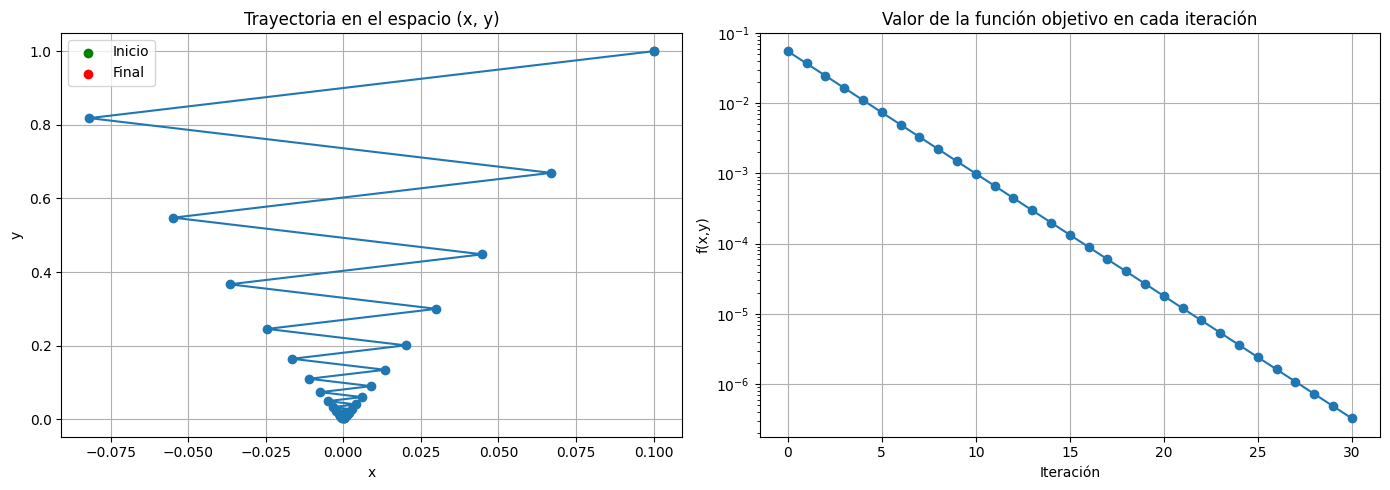

In [4]:
import numpy as np
import matplotlib.pyplot as plt

numero_pasos = 30
a = 1
b = 0.1
gradiente = [a, b]

def evaluar_gradiente(vector):
    return [vector[0] * gradiente[0], vector[1] * gradiente[1]]

def evaluar_funcion(vector):
    return 0.5 * (a * vector[0]**2 + b * vector[1]**2)

# Parámetros de backtracking
rho = 0.3
c = 1e-4

# Valores iniciales
x = [1, 1]
alpha_inicial = 2 / (1 + b)

# Espacio para graficar (opcional)
xx = np.linspace(-2*b, 0.5, num=100)
yy = np.linspace(-b, 1 + b, num=200)

xk_gd = np.zeros(numero_pasos+1)
yk_gd = np.zeros(numero_pasos+1)
fk_gd = np.zeros(numero_pasos+1)

xk_gd[0] = b
yk_gd[0] = 1
fk_gd[0] = evaluar_funcion([xk_gd[0], yk_gd[0]])

for i in range(numero_pasos):
    grad_actual = evaluar_gradiente([xk_gd[i], yk_gd[i]])
    
    alpha = alpha_inicial  # Reiniciamos alpha en cada iteración

    # Condición de backtracking
    while True:
        x_trial = xk_gd[i] - alpha * grad_actual[0]
        y_trial = yk_gd[i] - alpha * grad_actual[1]
        f_trial = evaluar_funcion([x_trial, y_trial])
        f_actual = fk_gd[i]
        descenso = f_actual - c * alpha * (grad_actual[0]**2 + grad_actual[1]**2)

        if f_trial <= descenso:
            break
        else:
            alpha *= rho  # Reduzco alpha si no satisface la condición

    # Actualizo con el alpha encontrado
    xk_gd[i+1] = xk_gd[i] - alpha * grad_actual[0]
    yk_gd[i+1] = yk_gd[i] - alpha * grad_actual[1]
    fk_gd[i+1] = evaluar_funcion([xk_gd[i+1], yk_gd[i+1]])

# -----------------------------
# Ploteo
# -----------------------------

plt.figure(figsize=(14,5))

# Plot trayectoria (x,y)
plt.subplot(1,2,1)
plt.plot(xk_gd, yk_gd, marker='o')
plt.title("Trayectoria en el espacio (x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.scatter(xk_gd[0], yk_gd[0], color='green', label='Inicio')
plt.scatter(xk_gd[-1], yk_gd[-1], color='red', label='Final')
plt.legend()

# Plot función objetivo vs iteraciones
plt.subplot(1,2,2)
plt.plot(range(numero_pasos+1), fk_gd, marker='o')
plt.title("Valor de la función objetivo en cada iteración")
plt.xlabel("Iteración")
plt.ylabel("f(x,y)")
plt.yscale("log")  # Escala logarítmica para ver mejor la bajada
plt.grid(True)

plt.tight_layout()
plt.show()
